1B

Image read and convert from gif to jpg

In [152]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open("lena_color.gif")
img = img.convert('RGB')
img.save("lena_color.jpg")

Grayscale Image

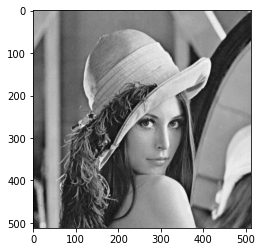

In [153]:
img_gray = cv2.imread("lena_color.jpg",0)
plt.imshow(img_gray,'gray')

Binary Thresholding

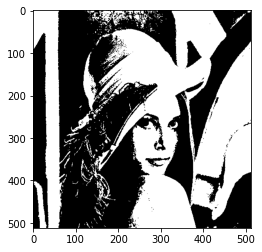

In [154]:
_,img_binary=cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
plt.imshow(img_binary,'gray')

Negative Transformation

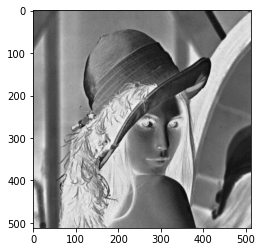

In [155]:
img_inv = cv2.bitwise_not(img_gray)
plt.imshow(img_inv,'gray')

Histogram Equalization

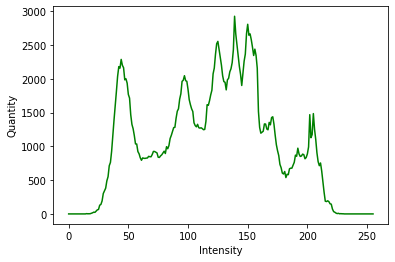

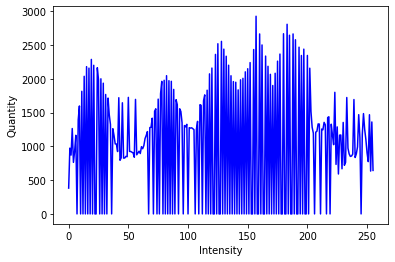

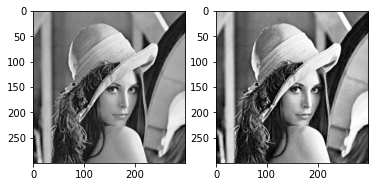

In [151]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


image_arr = cv2.imread('lena_color.jpg', cv2.IMREAD_GRAYSCALE)



height = image_arr.shape[0]
width = image_arr.shape[1]
intensity_count = np.zeros(256)

for i in range(height):
  for j in range(width):
    intensity_count[image_arr[i][j]]+=1

#plotting
plt.plot(intensity_count,'g',label='Lung')
plt.ylabel('Quantity')
plt.xlabel('Intensity')
plt.show()

intensity_count_eq = np.zeros(256)
eq_img= cv2.equalizeHist(image_arr)

for i in range(height):
  for j in range(width):
    intensity_count_eq [eq_img[i][j]]+=1

#plotting
plt.plot(intensity_count_eq,'b',label='Lung Eq')
plt.ylabel('Quantity')
plt.xlabel('Intensity')
plt.show()



#histogram equalization
image_arr=cv2.resize(image_arr,(300,300))
eq_img=cv2.resize(eq_img,(300,300))

plt.subplot(1,2,1)
plt.imshow(image_arr,"gray")

plt.subplot(1,2,2)
plt.imshow(eq_img,"gray")
plt.show()

2

[[ 0.44444444  0.55555556  0.66666667 ...  0.          0.
   0.        ]
 [ 0.88888889  0.77777778  0.44444444 ...  0.          0.
   0.        ]
 [ 1.          0.88888889  0.44444444 ...  0.          0.
   0.        ]
 ...
 [ 3.66666667  9.33333333 10.88888889 ...  6.88888889  5.33333333
  -6.66666667]
 [ 2.77777778  6.22222222 15.55555556 ...  6.77777778  2.66666667
  -6.66666667]
 [ 0.22222222 -4.88888889  2.88888889 ...  0.77777778 -0.55555556
  -4.        ]]


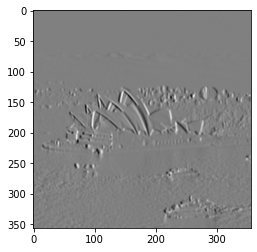

In [156]:
img = cv2.imread("Sydney-Opera-House.jpg",0)
filter1 = np.array([
      [1/9,1/9,1/9],
      [1/9,1/9,1/9],
      [1/9,1/9,1/9]
     ])
filter2 = np.array(
      [
      [1,0,-1],
      [1,0,-1],
      [1,0,-1]
      ])


def convo(hasil,input,filter):
  for i in range (len(input)-2):
    baris=[]
    for j in range (len(input)-2):
      ans=( input[i][j]*filter[0][0]+input[i][j+1]*filter[0][1]+input[i][j+2]*filter[0][2] + 
      input[i+1][j]*filter[1][0]+input[i+1][j+1]*filter[1][1]+input[i+1][j+2]*filter[1][2] + 
      input[i+2][j]*filter[2][0]+input[i+2][j+1]*filter[2][1]+input[i+2][j+2]*filter[2][2])
      baris.append(ans)
    hasil.append(baris)
  return hasil


hasil1=[]
convo(hasil1,img,filter1)
hasil1=np.array(hasil1)

hasil2=[]
convo(hasil2,hasil1,filter2)
hasil2=np.array(hasil2)
print(hasil2)


plt.imshow(hasil2,'gray')

3d

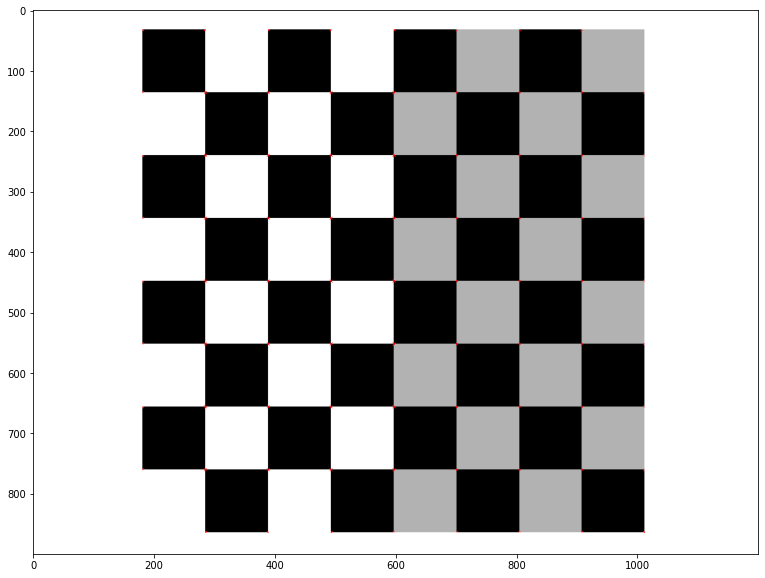

In [157]:
checkimg = cv2.imread("checkerboard_101.png") #read image 
gray_check =cv2.cvtColor(checkimg,cv2.COLOR_BGR2GRAY) 
gray_check=np.float32(gray_check)
harris_result=cv2.cornerHarris(gray_check,2,5,0.04)

result=checkimg.copy()
result[harris_result>0.01*harris_result.max()]=[0,0,255]
result = cv2.cvtColor(result,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(result)



The result will be red in the picture above.

4

In [158]:
import numpy as np

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

In [159]:
from scipy import ndimage

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

In [160]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

In [161]:
def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

In [162]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

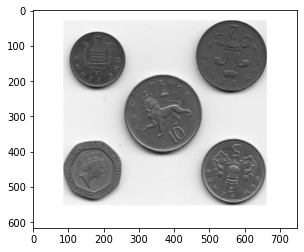

In [163]:
from PIL import Image,ImageOps
import matplotlib.pyplot as plt

imgs = cv2.imread("DetectAndMeasureCircularObjectsThingSpeakExample_01.png",0)
imgs = imgs.astype("float32")
plt.imshow(imgs,"gray")
# convert our image into a numpy array
imgs = np.asarray(imgs)


4a blur the image for noise reduction we need reduce the noise because edge detection result are highly sensitive to image noice

In [164]:
blur = ndimage.filters.convolve(imgs, gaussian_kernel(5, sigma=1.4))

4b finding intensity gradient of the image -> we find this because of Edge correspond to a change of pixels's intensity. To detect it, we apply filter that highlight the intensity change in both directions:
horizontal(x) and vertical(y)
this will output the intensity and edge direction matrices

we use sobel filter for this stage

In [165]:
gradientMat,thetaMat = sobel_filters(blur)

4c Non max Suppression 
ideally the final image should have thin edge. thats why we use non maximum suppression to thin out edge.
the algorithm goes through all the point on gradient intensity matrix and finds the pixels with maximum value in edge directions 

it will output the same image with thinner edges.

In [166]:
nonMaxImg=non_max_suppression(gradientMat,thetaMat)

Hysteresis works by transforming weak pixels into strong ones, if the last ont of the pixels around the one being processed is a strong one.
we use this to make the edge more clear.

we use double threshold to identify strong,weak,and non-relevant pixel



In [167]:
res,weak,strong=threshold(nonMaxImg)

In [168]:
imgs_final = hysteresis(res,weak,strong)

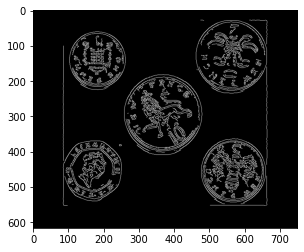

In [169]:
plt.imshow(imgs_final,"gray")

source : https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123